<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/16%EC%9E%A5/16%EC%9E%A5(%ED%91%B8%EB%A6%AC%EC%97%90%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

푸리에 분석에 대한 소개로 시계열 데이터에 대한 주기 및 패턴분석 기법

1. 정현파에 대한 이해와 커브피팅에서 정현파가 어떻게 사용될 수 있는지 이해
2. 최소자승법을 이용한 정현파커브 피팅
3. 오일러 공식을 바탕으로 정현파와 복소 지수함수 사이의 관계에 대한 이해
4. 주파수 영역에서 수학적 함수 또는 신호분석의 이점을 이해
5. 비주기적 함수와 신호에 대해 푸리에 적분과 변환을 통한 푸리에 분 분석의 확장
6. 이산 푸리에 변환(DFT)을 통한 푸리에 분석의 샘플링된 신호로의 확장
7. 파이썬을 이용한 DFT와 FFT를 계산하는 방법을 알고 결과를 해석하는 방법을 이해
8. 파워 스펙트럼을 계산하고 해석하는 방법


예제: 16.3 파이썬으로 단순 정현파의 DFT 계산하기

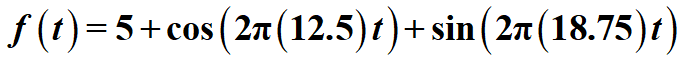

detta t = 0.02초, 8개 등간격

[ 5. -0.j   0. +0.j   0.5-0.j  -0. -0.5j  0. -0.j  -0. +0.5j  0.5+0.j
  0. -0.j ]


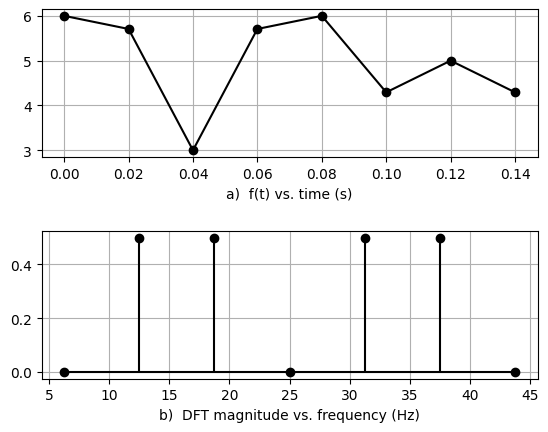

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
# compute the time series
n = 8 ; dt = 0.02 ; fs = 1/dt ; T = 0.16
tspan = np.arange(0,n)/fs
y = 5 + np.cos(2*np.pi*12.5*tspan) + np.sin(2*np.pi*18.75*tspan)
# create a frame for 2 subplots
# and plot the time samples
# as the first subplot
fig=plt.figure()
ax1 = fig.add_subplot(211)
fig.subplots_adjust(hspace=0.5)
ax1.plot(tspan,y,c='k',marker='o')
ax1.grid()
ax1.set_xlabel('a)  f(t) vs. time (s)')

# compute and print the DFT
np.set_printoptions(precision=3, suppress=True)
Y = fft(y)/n
print(Y)


# plot the magnitude of the DFT
# as the second subplot

Ymag = abs(Y[1:])
freq = np.arange(1,n)/T
ax2 = fig.add_subplot(212)
ax2.stem(freq,Ymag,basefmt='k-',linefmt='k-',markerfmt='ko')
ax2.set_xlabel('b)  DFT magnitude vs. frequency (Hz)')
ax2.grid()


사례연구

Wolf Sunspot Number Versus Year <br>
1868년 요한 루돌프 볼프는 태양 표면에 있는 개별적인 검은 반점 또는반점의 그룹의 수를 세어서 태양활동을 정량화 함.그룹수에 1년의 개별 반점의 총 수를10배 더해서 현재 Wolf 흑점수를 계산함. 기록에 기반으로 11.1년으로 주기를 결정함. 푸리에 분석을 사용하여 데이터에 FFT를 적용해서 결과를 확인하자 <br>
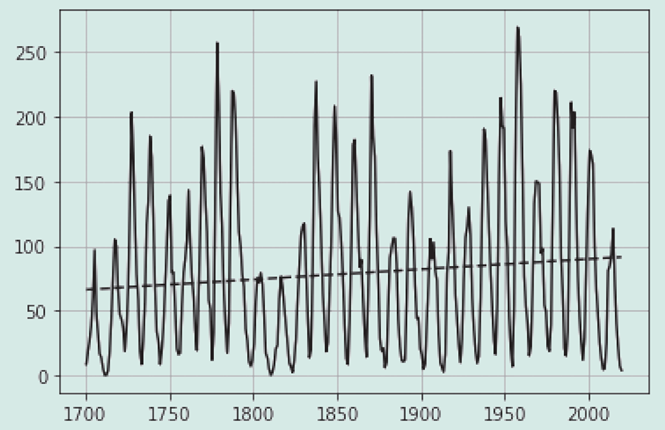

Text(0, 0.5, 'Power')

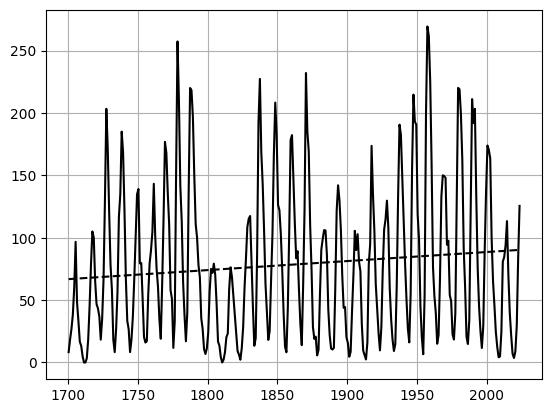

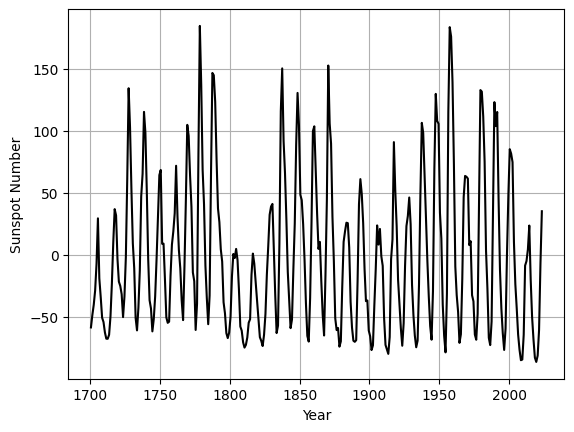

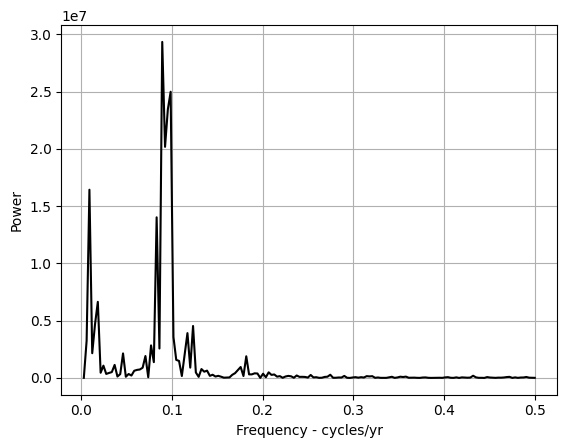

In [24]:
import numpy as np
import pylab

# Load data from CSV file
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/SN_y_tot_V2.0.csv', delimiter=';', unpack=True)
yr, numspots = data[0], data[1]

pylab.plot(yr,numspots,c='k')
pylab.grid()
coef = np.polyfit(yr,numspots,1)
pylab.plot(yr,np.polyval(coef,yr),c='k',ls='--')

y = numspots - np.polyval(coef,yr)
pylab.figure()
pylab.plot(yr,y,c='k')
pylab.grid()
pylab.xlabel('Year')
pylab.ylabel('Sunspot Number')

from scipy.fft import fft
Y = fft(y)
fs = 1  # 1/yr
n = len(yr)
f = np.arange(1,n)*fs/n
n2 = int(n/2)
f2 = f[0:n2]
Y2 = Y[1:n2+1]
Pyy = abs(Y2)**2
pylab.figure()
pylab.plot(f2,Pyy,c='k')
pylab.grid()
pylab.xlabel('Frequency - cycles/yr')
pylab.ylabel('Power')


In [26]:
pmax = np.max(Pyy)
for i in range(n2):
  if Pyy[i] >= pmax:
    imax = i
    fmax = f2[i]
    break

print('Frequency at max power = ', fmax,' 1/yr')
print('Period at max power = ', 1/fmax,' years')

Frequency at max power =  0.08950617283950617  1/yr
Period at max power =  11.172413793103448  years


# **실습: 연습문제**

16.6  In electrical circuits, it is common to see current behavior in the form of a rectangular wave as shown in Fig. P16.6. Note that this wave differs from the one described in Example 16.2. From the functional description

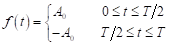

the Fourier series can be represented as <br>
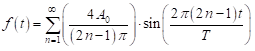
<br>
Develop a Python script to generate and plot the first six terms of the series. Also, plot the sum of these terms. Do this for the range 0 ≤ t ≤ 4T. Use dotted black lines for the individual terms and a solid black line for the sum. As shown in the figure, A0 = 1 and T = 0.25.

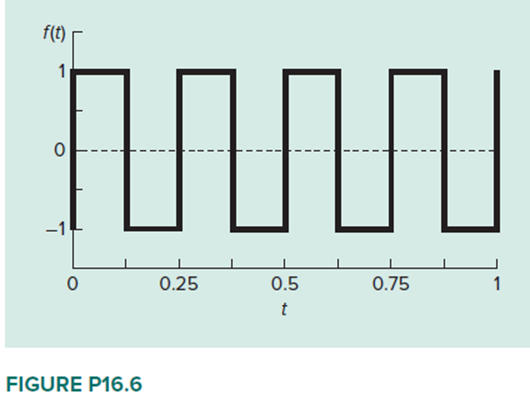

Text(0, 0.5, 'f(t)')

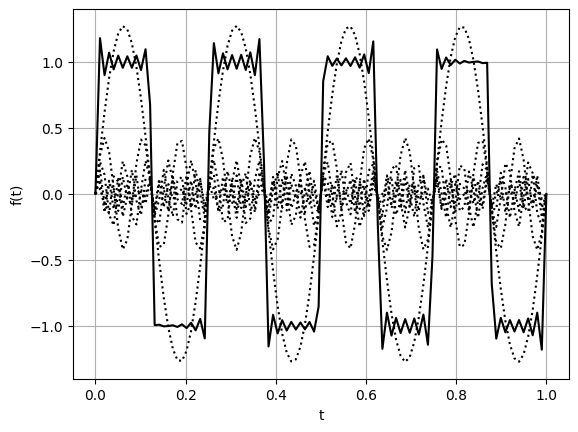

In [28]:
import numpy as np
import pylab

def fterm(n,t,A0,T):
    m = len(t)
    term = np.zeros((m))
    for i in range(m):
        term[i] = 4*A0/(2*n-1)/np.pi*np.sin(2*np.pi*(2*n-1)*t[i]/T)
    return term

T = 0.25
A0 = 1
tm = np.linspace(0.,4*T,100)
nmax = 6
termsum = np.zeros((100))
for n in range(nmax):
    term = fterm(n+1,tm,A0,T)
    pylab.plot(tm,term,c='k',ls=':')
    termsum = termsum + term
pylab.plot(tm,termsum,c='k')
pylab.grid()
pylab.xlabel('t')
pylab.ylabel('f(t)')


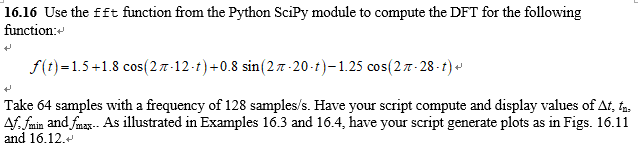

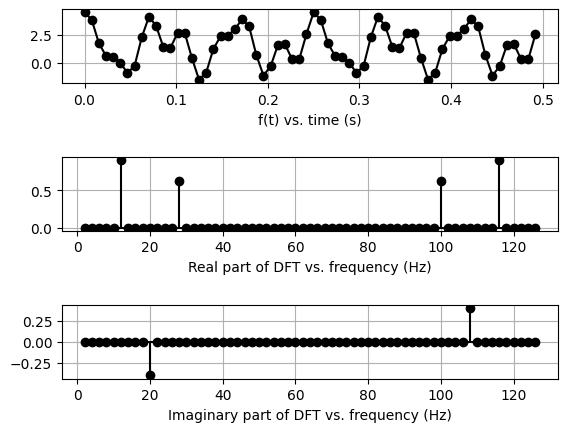

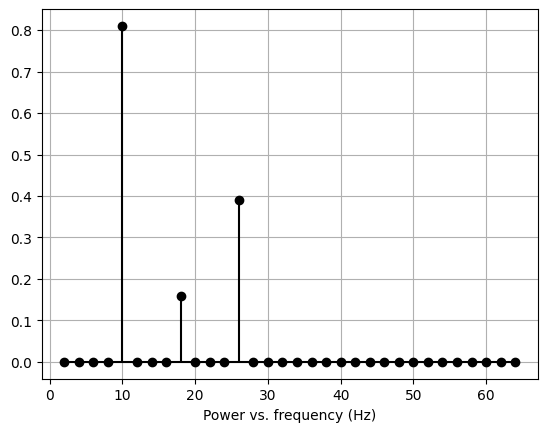

In [34]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt

n = 64 ; fs = 128 ; dt = 1/fs ; tn = n/fs
fmax = fs/2 ; fmin = 1/tn ; df = fmin

tspan = np.arange(0,n)/fs
y = 1.5 + 1.8*np.cos(2*np.pi*12.*tspan) + 0.8*np.sin(2*np.pi*20.*tspan) \
    + 1.25*np.cos(2*np.pi*28*tspan)

# create a frame for 3 subplots
# and plot the time samples
# as the first subplot
fig=plt.figure()
ax1 = fig.add_subplot(311)
fig.subplots_adjust(hspace=1.)
ax1.plot(tspan,y,c='k',marker='o')
ax1.grid()
ax1.set_xlabel('f(t) vs. time (s)')

# compute the DFT and power
Y = fft(y)/n
Ypow = abs(Y[1:])**2
freq = np.arange(1,n)/tn

Yreal = np.real(Y[1:])
ax2 = fig.add_subplot(312)
ax2.stem(freq,Yreal,basefmt='k-',linefmt='k-',markerfmt='ko')
ax2.set_xlabel('Real part of DFT vs. frequency (Hz)')
ax2.grid()

Yimag = np.imag(Y[1:])
ax2 = fig.add_subplot(313)
ax2.stem(freq,Yimag,basefmt='k-',linefmt='k-',markerfmt='ko')
ax2.set_xlabel('Imaginary part of DFT vs. frequency (Hz)')
ax2.grid()

n2 = int(n/2)
freq2 = freq[0:n2]
Y2 = Ypow[1:n2+1]
Pyy = abs(Y2)**2
fig2 = plt.figure()
plt.stem(freq2,Y2,basefmt='k-',linefmt='k-',markerfmt='ko')
plt.xlabel('Power vs. frequency (Hz)')
plt.grid()
